# Importing libraries

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Loading the train dataset and test dataset

In [2]:
diab_train=pd.read_csv("diab_train.csv")
diab_test=pd.read_csv("diab_test.csv")

# Pre-Processing the train dataset

In [3]:
diab_train.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


In [4]:
diab_train.tail()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
609,14,1,189,60,23,846,30.1,0.398,59,1
610,555,1,84,64,23,115,36.9,0.471,28,0
611,730,2,92,52,0,0,30.1,0.141,22,0
612,103,0,125,96,0,0,22.5,0.262,21,0
613,603,1,124,74,36,0,27.8,0.100,30,0


In [5]:
diab_train.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,120.542345,68.765472,20.244300,79.355049,31.909935,0.466342,33.325733,0.348534
std,223.603024,3.358126,31.252286,19.914836,15.886083,117.709950,8.007699,0.331090,11.929569,0.476895
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.250000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


In [6]:
diab_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   614 non-null    int64  
 1   no_times_pregnant      614 non-null    int64  
 2   glucose_concentration  614 non-null    int64  
 3   blood_pressure         614 non-null    int64  
 4   skin_fold_thickness    614 non-null    int64  
 5   serum_insulin          614 non-null    int64  
 6   bmi                    614 non-null    float64
 7   diabetes pedigree      614 non-null    float64
 8   age                    614 non-null    int64  
 9   diabetes               614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


In [7]:
diab_train.isnull().sum()

p_id                     0
no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
diabetes pedigree        0
age                      0
diabetes                 0
dtype: int64

In [8]:
diab_train["p_id"].value_counts()

1      1
519    1
512    1
513    1
514    1
      ..
256    1
258    1
260    1
262    1
768    1
Name: p_id, Length: 614, dtype: int64

In [9]:
diab_train["no_times_pregnant"].value_counts()

1     100
0      90
2      84
3      65
4      59
6      42
5      41
7      32
8      30
9      25
10     20
11      9
13      8
12      6
14      1
15      1
17      1
Name: no_times_pregnant, dtype: int64

In [10]:
diab_train["glucose_concentration"].value_counts()

99     15
106    12
125    12
100    12
112    12
       ..
75      1
149     1
77      1
86      1
67      1
Name: glucose_concentration, Length: 127, dtype: int64

In [11]:
diab_train["blood_pressure"].value_counts()

70     46
74     39
78     38
80     35
72     35
60     33
68     33
62     32
0      31
64     30
76     28
82     22
88     21
66     20
90     19
84     19
58     17
86     17
54     11
52     11
50      8
56      7
65      7
92      6
75      6
94      6
85      5
96      4
44      4
98      3
100     2
104     2
106     2
110     2
30      2
46      2
48      2
55      1
40      1
24      1
102     1
108     1
61      1
114     1
Name: blood_pressure, dtype: int64

In [12]:
diab_train["skin_fold_thickness"].value_counts()

0     187
30     25
32     24
27     20
23     19
31     17
18     15
33     14
28     14
22     14
40     14
41     13
17     12
37     12
35     12
19     12
26     12
13     11
39     11
36     11
29     11
20     11
25     11
42     10
15     10
24      9
21      8
38      7
14      6
46      5
12      5
45      5
44      5
47      4
10      4
34      4
16      4
43      3
11      3
48      3
50      3
7       2
8       2
49      2
52      2
54      2
51      1
56      1
60      1
63      1
Name: skin_fold_thickness, dtype: int64

In [13]:
diab_train["serum_insulin"].value_counts()

0      304
105      9
100      7
120      7
140      7
      ... 
188      1
52       1
183      1
53       1
846      1
Name: serum_insulin, Length: 163, dtype: int64

In [14]:
diab_train["bmi"].value_counts()

31.6    11
0.0     10
32.0    10
31.2     9
32.4     9
        ..
19.9     1
26.3     1
40.7     1
40.2     1
31.1     1
Name: bmi, Length: 237, dtype: int64

In [15]:
diab_train["diabetes pedigree"].value_counts()

0.254    6
0.268    5
0.259    5
0.237    4
0.284    4
        ..
0.409    1
0.485    1
0.464    1
0.549    1
0.804    1
Name: diabetes pedigree, Length: 439, dtype: int64

In [16]:
diab_train["diabetes"].value_counts()

0    400
1    214
Name: diabetes, dtype: int64

<AxesSubplot:xlabel='no_times_pregnant', ylabel='count'>

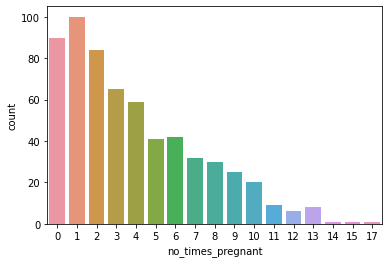

In [17]:
sns.countplot(x="no_times_pregnant",data=diab_train)

<AxesSubplot:xlabel='blood_pressure', ylabel='count'>

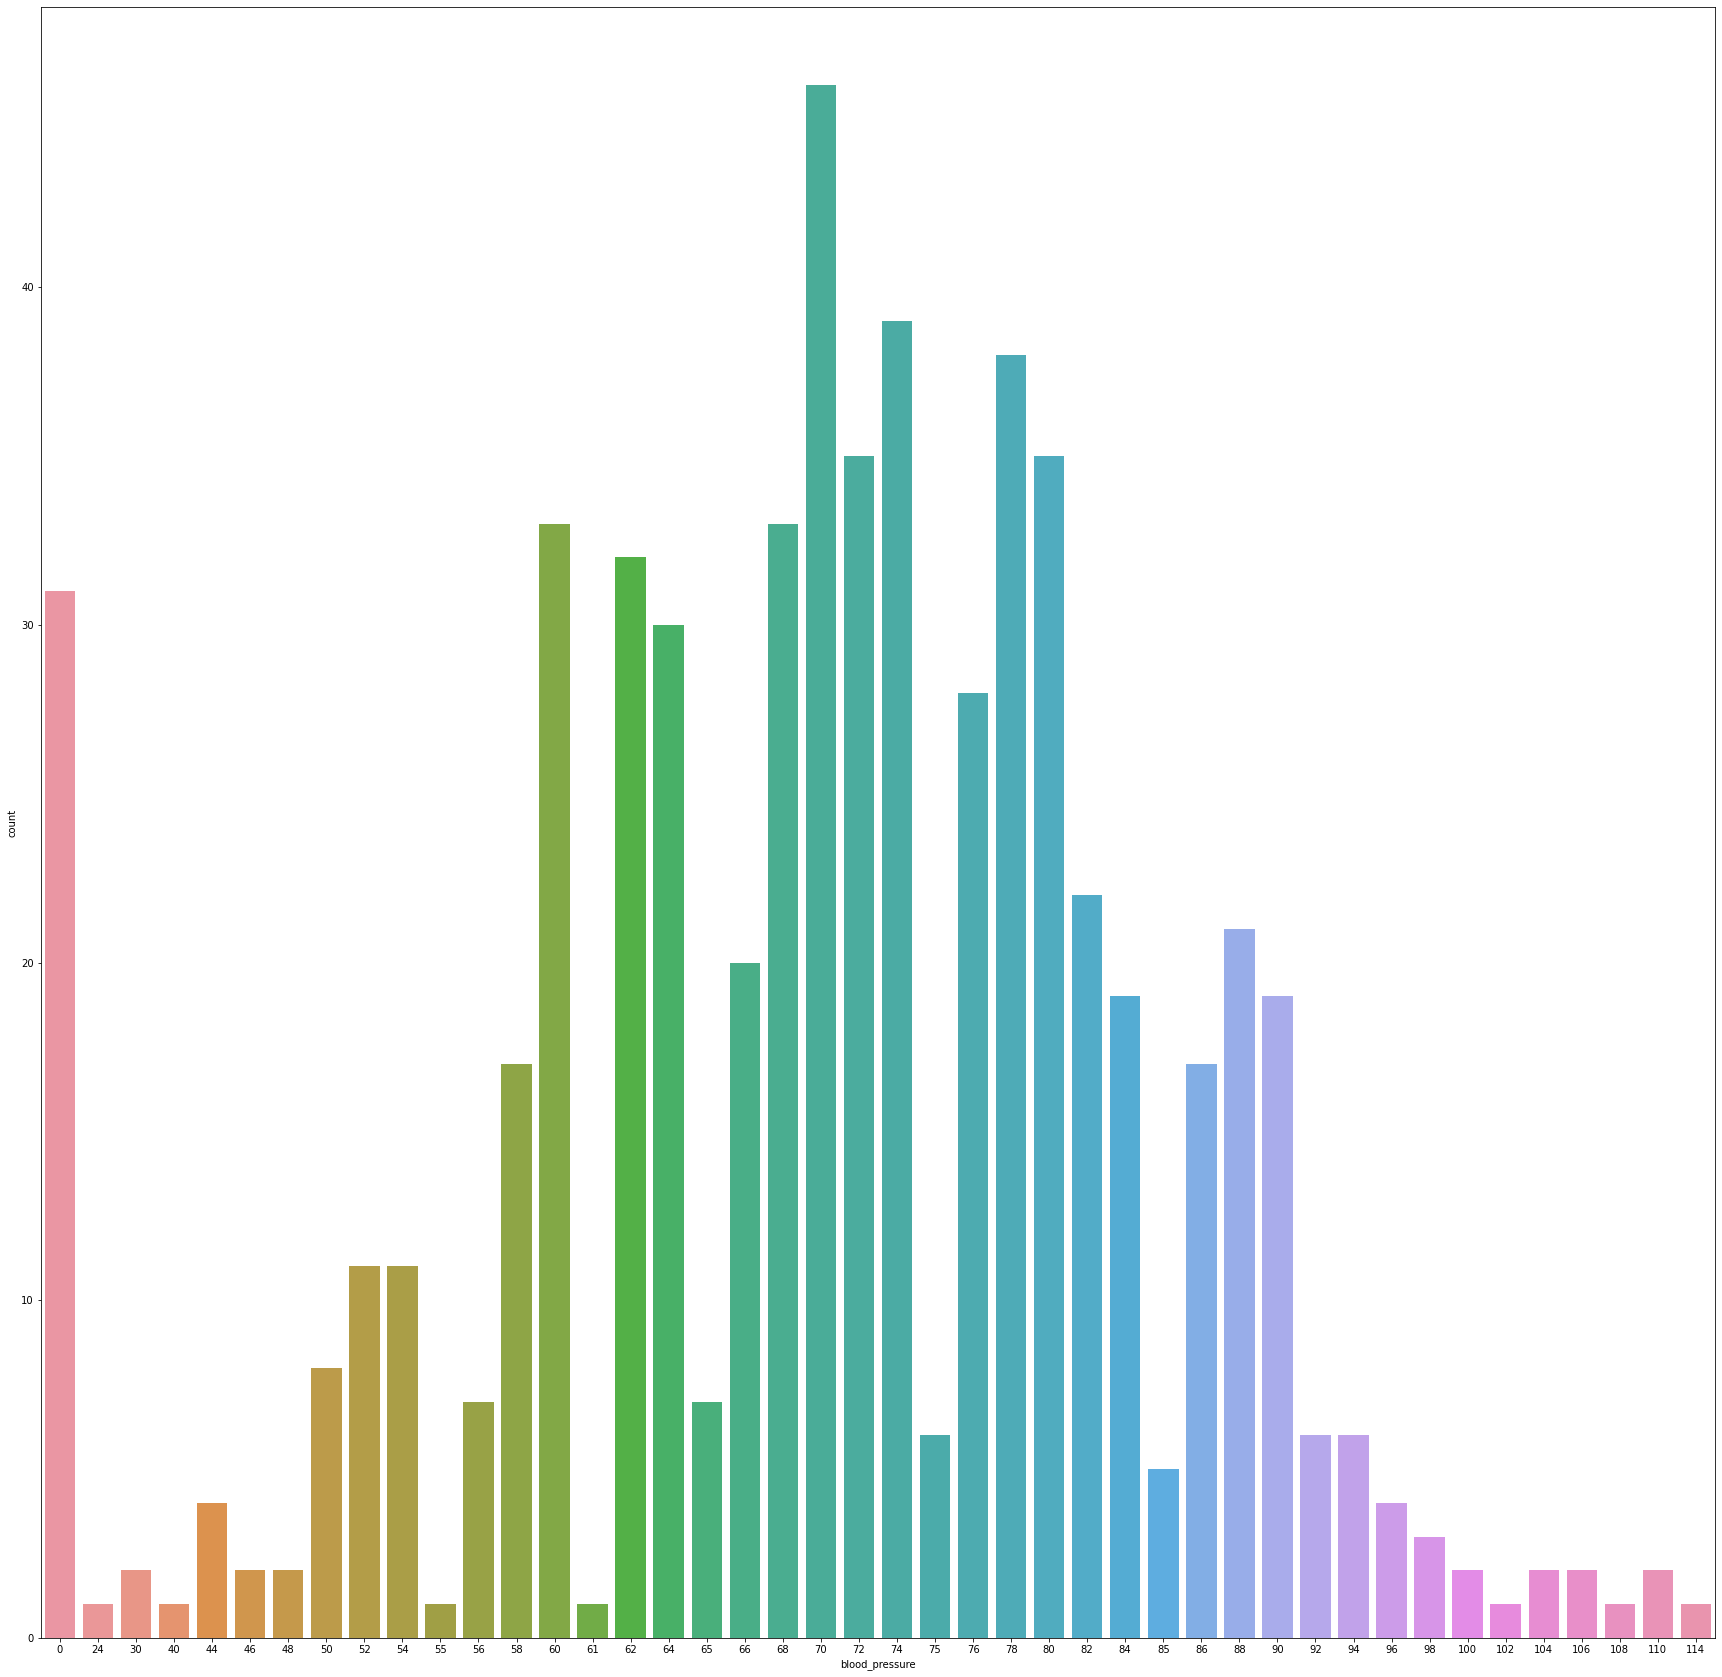

In [18]:
plt.figure(figsize=(30,30))
sns.countplot(x="blood_pressure",data=diab_train)

<AxesSubplot:xlabel='skin_fold_thickness', ylabel='count'>

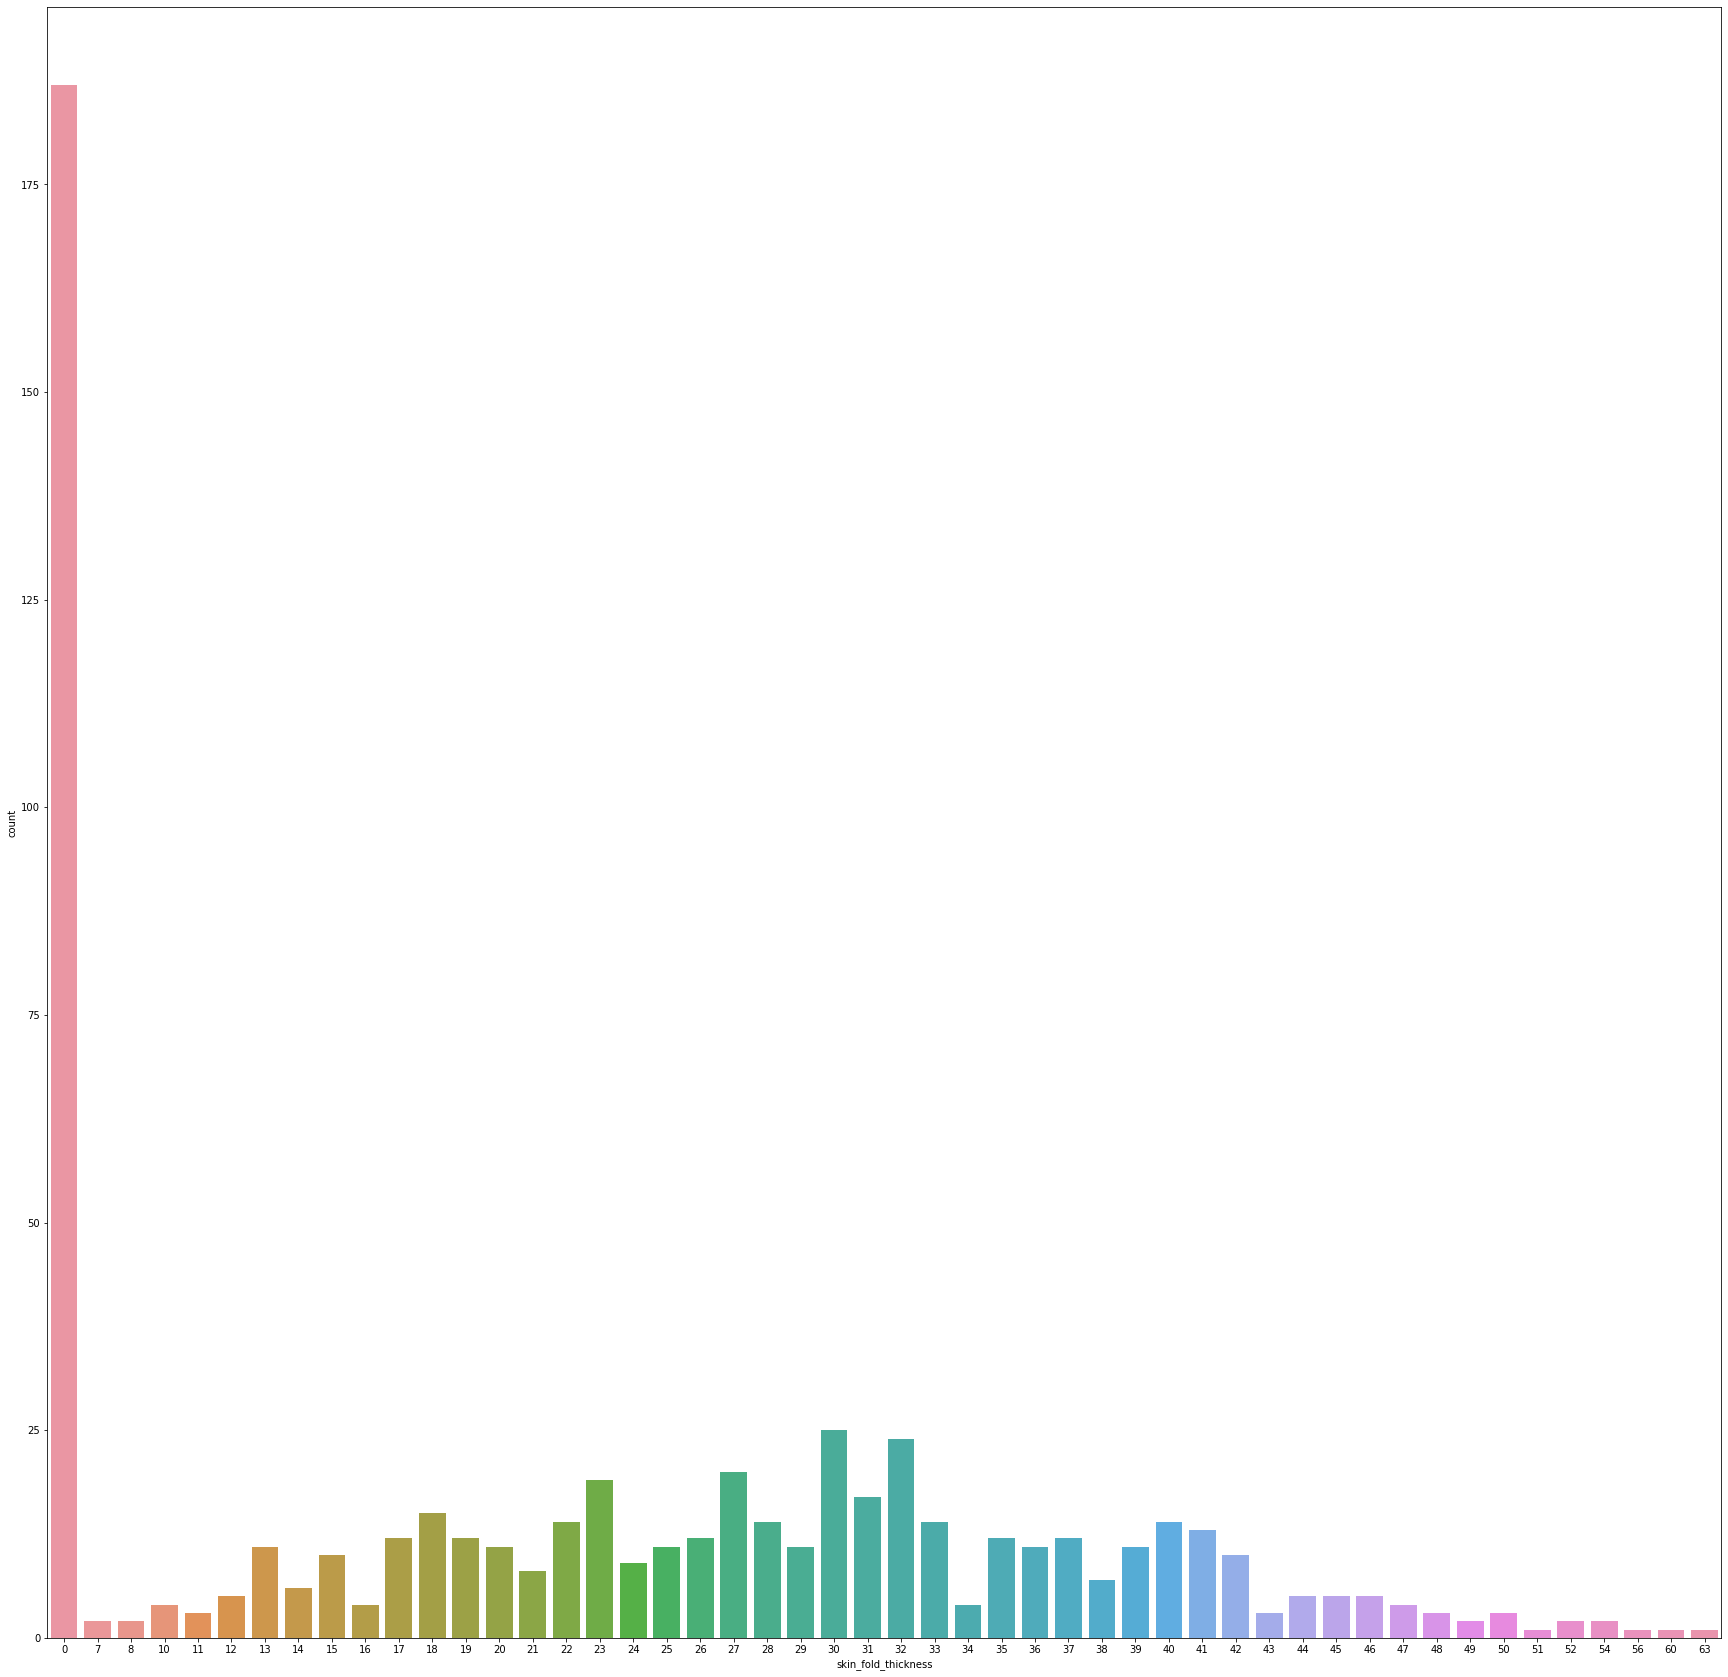

In [19]:
plt.figure(figsize=(30,30))
sns.countplot(x="skin_fold_thickness",data=diab_train)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

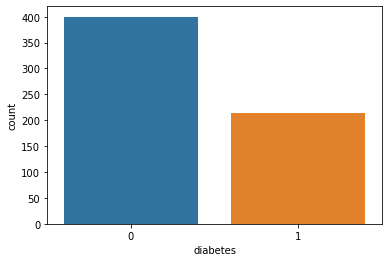

In [20]:
sns.countplot(x="diabetes",data=diab_train)

In [21]:
diab_train.corr()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
p_id,1.000000,-0.034607,-0.001407,0.027835,0.008890,0.011636,-0.003948,-0.052759,0.020156,-0.071237
no_times_pregnant,-0.034607,1.000000,0.123416,0.140526,-0.085653,-0.091123,-0.004101,-0.005811,0.534231,0.209196
glucose_concentration,-0.001407,0.123416,1.000000,0.160167,0.043053,0.330860,0.222449,0.131274,0.241590,0.469336
blood_pressure,0.027835,0.140526,0.160167,1.000000,0.214275,0.088827,0.296000,0.042320,0.236387,0.072003
skin_fold_thickness,0.008890,-0.085653,0.043053,0.214275,1.000000,0.439886,0.413288,0.187470,-0.144741,0.052695
serum_insulin,0.011636,-0.091123,0.330860,0.088827,0.439886,1.000000,0.200914,0.176183,-0.052863,0.116562
bmi,-0.003948,-0.004101,0.222449,0.296000,0.413288,0.200914,1.000000,0.116301,0.025209,0.275263
diabetes pedigree,-0.052759,-0.005811,0.131274,0.042320,0.187470,0.176183,0.116301,1.000000,0.053637,0.173301
age,0.020156,0.534231,0.241590,0.236387,-0.144741,-0.052863,0.025209,0.053637,1.000000,0.221736
diabetes,-0.071237,0.209196,0.469336,0.072003,0.052695,0.116562,0.275263,0.173301,0.221736,1.000000


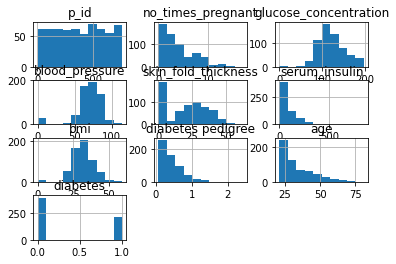

In [22]:
diab_train.hist()
plt.show()

<AxesSubplot:>

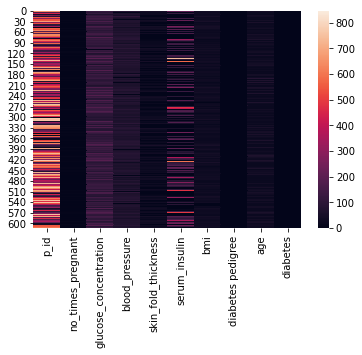

In [23]:
sns.heatmap(diab_train)

# Splitting of train data

In [24]:
x = diab_train.drop('diabetes',axis=1)
y = diab_train['diabetes']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,stratify=y)

# Building the model

In [26]:
rt=RandomForestClassifier(max_depth=5,min_samples_split=3)
rt.fit(x_train,y_train)
rtpredictions = rt.predict(x_test)
rtpredictions

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [27]:
acc = accuracy_score(y_test,rtpredictions)
acc

0.7675675675675676

In [34]:
lr=LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\deept\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_pred=lr.predict(x_test)

In [37]:
acc = accuracy_score(y_test,y_pred)
acc

0.7189189189189189

In [51]:
clf_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5)
clf_entropy.fit(x_train,y_train)
y_pred=clf_entropy.predict(x_test)

In [53]:
accuracy_score(y_test,y_pred)

0.7351351351351352

In [ ]:
From the above models, we have got the high accuracy in decision tree model.

In [28]:
diab_test.shape

(154, 9)

In [29]:
diab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   154 non-null    int64  
 1   no_times_pregnant      154 non-null    int64  
 2   glucose_concentration  154 non-null    int64  
 3   blood_pressure         154 non-null    int64  
 4   skin_fold_thickness    154 non-null    int64  
 5   serum_insulin          154 non-null    int64  
 6   bmi                    154 non-null    float64
 7   diabetes pedigree      154 non-null    float64
 8   age                    154 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 11.0 KB


In [30]:
diab_test.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,379.422078,3.811688,122.298701,70.461039,21.701299,81.571429,32.322078,0.493942,32.902597
std,215.338912,3.425719,34.769480,16.935917,16.213095,105.178271,7.386724,0.332439,11.090106
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000
25%,194.250000,1.000000,97.000000,64.000000,0.000000,0.000000,28.150000,0.248000,24.000000
50%,383.000000,3.000000,115.000000,72.000000,24.500000,52.000000,32.900000,0.411500,29.500000
75%,583.250000,6.000000,144.750000,78.000000,33.000000,129.500000,36.200000,0.654750,40.000000
max,738.000000,14.000000,199.000000,122.000000,99.000000,474.000000,67.100000,2.137000,66.000000


In [31]:
diab_test.isnull().sum()

p_id                     0
no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
diabetes pedigree        0
age                      0
dtype: int64

In [54]:
subpredictions = clf_entropy.predict(diab_test)
subpredictions

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)